In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

In [6]:
#Show the first 10 entries
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [7]:
#What is the number of observations in the dataset?
len(df)

4622

In [8]:
#What is the number of columns in the dataset?
df.shape

(4622, 5)

In [9]:
#Which was the most-ordered item and how many times it was ordered?
vals = df.groupby('item_name').count()
vals.sort_values('quantity', ascending=False).head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,726,726,726,726
Chicken Burrito,553,553,553,553
Chips and Guacamole,479,479,0,479
Steak Burrito,368,368,368,368
Canned Soft Drink,301,301,301,301


In [10]:
#How many different items are sold?
len(vals)

50

In [11]:
#How many items were orderd in total?
df['quantity'].sum()

4972

In [12]:
#Turn the item price into a float
df['item_price_float'] = df['item_price'].apply(lambda x: float(x[1:]))
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [13]:
#What is the price of each item?
df.groupby('item_name')['item_price_float'].mean().head()

item_name
6 Pack Soft Drink         6.610185
Barbacoa Bowl            10.187273
Barbacoa Burrito          9.832418
Barbacoa Crispy Tacos    10.928182
Barbacoa Salad Bowl      10.640000
Name: item_price_float, dtype: float64

In [14]:
#How much was the revenue for the period in the dataset?
(df['quantity'] * df['item_price_float']).sum()

39237.02

In [15]:
#How many orders were made in the period?
df['order_id'].value_counts().shape

(1834,)

In [16]:
#What is the average revenue amount per order?
np.sum(pd.to_numeric(df.quantity).values*pd.to_numeric(df.item_price_float).values)/df.order_id.value_counts().index.size

21.39423118865867

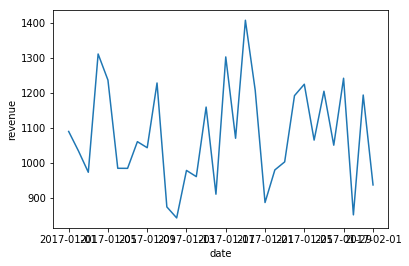

In [17]:
#Merge the table dfa that contains order date and order id with df and plot daily revenue
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=df.order_id.value_counts().index.size),
                   "order_id": np.arange(df.order_id.value_counts().index.size)})
a = dfa.date[df.order_id - 1]
a.index = np.arange(a.size)
df['date'] = a
df.item_price = pd.to_numeric(df.item_price_float)
c = df.groupby('date')['item_price'].sum()
plt.plot(c.index, c.values)
plt.xlabel("date")
plt.ylabel("revenue")
plt.show()

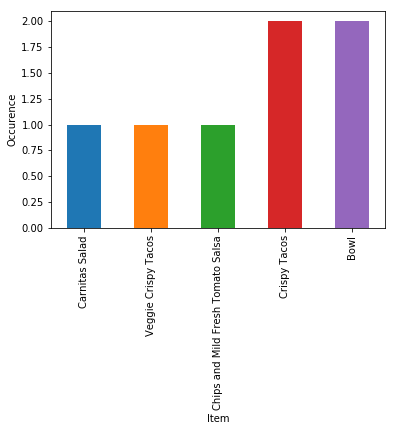

In [19]:
#Create a histogram of the top 5 items bought

ds = pd.merge(df, dfa, on='order_id')
s = ds.groupby('item_name').size().sort_values()[0:5]
ax = s.plot.bar(x = 'item_name') 
plt.ylabel('Occurence')
plt.xlabel('Item')
plt.show()

In [20]:
#Sort the dataset by the name of the item
df.sort_values(by=['item_name']).head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float,date
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,12.98,2017-01-01
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49,2017-01-01
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49,2017-01-01
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49,2017-01-11
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49,2017-01-30


In [21]:
#How many times were a Veggie Salad Bowl ordered?
np.sum(df.loc[(df.item_name == 'Veggie Salad Bowl')]['quantity'].values)

18

In [22]:
#How many times people orderd more than one Canned Soda?
df.loc[(df.item_name == 'Canned Soda') & (df.quantity > 1)].size

140

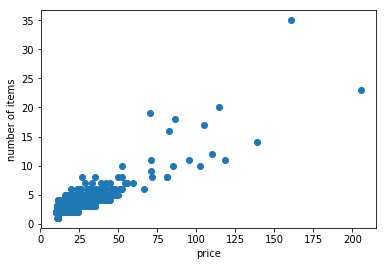

In [23]:
#Create a scatterplot with the number of items orderered per order price
df.item_price = pd.to_numeric(df.item_price_float)
a = df.groupby('order_id')['item_price'].sum()
b = df.groupby('order_id')['quantity'].sum()
plt.scatter(a.values, b.values)
plt.xlabel("price")
plt.ylabel("number of items")
plt.show()